# Modeling

## Objectives

This notebook implements **predictive modeling** using the feature-engineered datasets produced in Notebook 05. The goal is to build, tune, and evaluate models for predicting engagement having set `popularity_score` as a proxy.

A stretch goal aims to perform clustering on user profiles for additional business insights and segmentation strategies.

Key priorities:

* Build regression/classification models for personalization and recommendations
* Evaluate model performance using appropriate metrics
* Document modeling choices and rationale

Stretch goals:
* Exploreclustering models for user segmentation

---

## Inputs

* `final_features.csv` — feature-engineered internal catalog
* `user_profile_features.csv` — feature-engineered supply catalog

---

## Tasks in This Notebook

1. **Load Feature-Engineered Data**
   Import datasets prepared for modeling.

2. **Model Selection and Training**
   Choose appropriate algorithms for clustering, regression, and/or classification. Train models using cross-validation and hyperparameter tuning.

3. **Model Evaluation**
   Assess model performance using metrics such as silhouette score (clustering), RMSE/MAE (regression), or accuracy/AUC (classification).

4. **Interpretation and Documentation**
   Analyze feature importances, cluster characteristics, and document modeling decisions.

5. **Save Model Artifacts**
   Export trained models, evaluation reports, and predictions for downstream use.

---

## Outputs

* Trained recommendation models
* Evaluation metrics and model comparison
* Model artifacts saved to `outputs/models/`
* Documentation of modeling logic and business rationale

Stretch Outputs:
* User segments and profiles from clustering analysis

>**Note:**
>This notebook focuses on **model training and evaluation**.
>Feature engineering steps are completed in the previous notebook.

# Set up

## Navigate to the Parent Directory

Before combining and saving datasets, it’s often helpful to move to a parent directory so that file operations (like loading or saving data) are easier and more organized. 

Before using the Python’s built-in os module to move one level up from the current working directory, it is advisable to inspect the current directory.

In [1]:
import os

# Get the current working directory
current_dir = os.getcwd()
print(f'Current directory: {current_dir}')

Current directory: c:\Users\reisl\OneDrive\Documents\GitHub\bookwise-analytics\notebooks


To change to parent directory (root folder), run the code below. If you are already in the root folder, you can skip this step.

In [2]:
# Change the working directory to its parent
os.chdir(os.path.dirname(current_dir))
print('Changed directory to parent.')

# Get the new current working directory (the parent directory)
current_dir = os.getcwd()
print(f'New current directory: {current_dir}')

Changed directory to parent.
New current directory: c:\Users\reisl\OneDrive\Documents\GitHub\bookwise-analytics


## Load Datasets

In this step, we load the previously cleaned datasets.

In [3]:
import pandas as pd
v = '1'

final_features = pd.read_csv(f'outputs/datasets/modeling/{v}/final_features.csv')
# drop 'gb_book_id' and 'goodreads_id_clean' columns after loading final_features
final_features = final_features.drop(
    columns=[col for col in ['gb_book_id', 'goodreads_id_clean'] if col in final_features.columns],
    errors='ignore'
)
user_profiles = pd.read_csv(f'outputs/datasets/modeling/{v}//user_profile_features.csv')

print(final_features.info())
print(user_profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   publication_year              9760 non-null   float64
 1   publication_decade            9760 non-null   float64
 2   publication_date_final        9760 non-null   object 
 3   has_award_final               9761 non-null   float64
 4   is_major_publisher_final      9761 non-null   float64
 5   external_rating               7834 non-null   float64
 6   external_likedpct             7834 non-null   float64
 7   external_bbe_ratings_1        7834 non-null   float64
 8   external_bbe_ratings_2        7834 non-null   float64
 9   external_bbe_ratings_3        7834 non-null   float64
 10  external_bbe_ratings_4        7834 non-null   float64
 11  external_bbe_ratings_5        7834 non-null   float64
 12  external_bbe_ratings_1_share  7834 non-null   float64
 13  ext

# Modeling

## Inspect and Prepare the Data

In this step, we inspect the loaded datasets for any inconsistencies or missing values that may affect modeling.

In [4]:
# Inspect target and features
print(final_features.shape)
print(final_features['popularity_score'].describe().round(2))
print(final_features.isnull().sum())

(9761, 34)
count    9761.00
mean       -0.00
std         2.07
min        -6.12
25%        -1.40
50%        -0.26
75%         1.11
max        10.91
Name: popularity_score, dtype: float64
publication_year                   1
publication_decade                 1
publication_date_final             1
has_award_final                    0
is_major_publisher_final           0
external_rating                 1927
external_likedpct               1927
external_bbe_ratings_1          1927
external_bbe_ratings_2          1927
external_bbe_ratings_3          1927
external_bbe_ratings_4          1927
external_bbe_ratings_5          1927
external_bbe_ratings_1_share    1927
external_bbe_ratings_2_share    1927
external_bbe_ratings_3_share    1927
external_bbe_ratings_4_share    1927
external_bbe_ratings_5_share    1927
genre_count                        0
has_genres                         0
is_top_genre                       0
is_top_author                      0
in_series                          0


       publication_year  publication_decade  has_award_final  \
count       9760.000000         9760.000000      9761.000000   
mean        1993.400615         1989.151639         0.365844   
std           32.523414           32.835990         0.481691   
min         1678.000000         1670.000000         0.000000   
25%         1991.000000         1990.000000         0.000000   
50%         2004.000000         2000.000000         0.000000   
75%         2011.000000         2010.000000         1.000000   
max         2020.000000         2020.000000         1.000000   

       is_major_publisher_final  external_rating  external_likedpct  \
count               9761.000000      7834.000000        7834.000000   
mean                   0.577297         4.021399          92.847843   
std                    0.494014         0.239987           4.032908   
min                    0.000000         2.510000          46.000000   
25%                    0.000000         3.870000          91.000000 

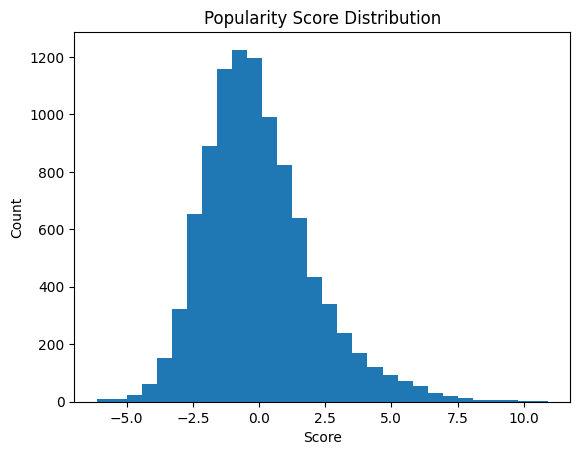

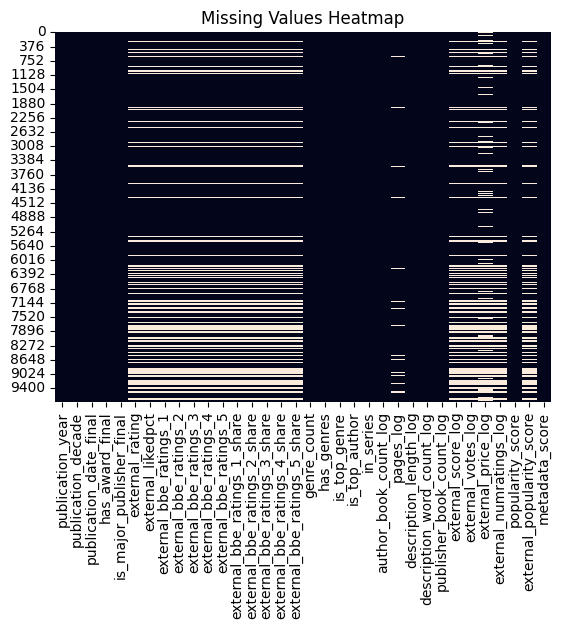

publication_year                   1
publication_decade                 1
publication_date_final             1
has_award_final                    0
is_major_publisher_final           0
external_rating                 1927
external_likedpct               1927
external_bbe_ratings_1          1927
external_bbe_ratings_2          1927
external_bbe_ratings_3          1927
external_bbe_ratings_4          1927
external_bbe_ratings_5          1927
external_bbe_ratings_1_share    1927
external_bbe_ratings_2_share    1927
external_bbe_ratings_3_share    1927
external_bbe_ratings_4_share    1927
external_bbe_ratings_5_share    1927
genre_count                        0
has_genres                         0
is_top_genre                       0
is_top_author                      0
in_series                          0
author_book_count_log              0
pages_log                        395
description_length_log             0
description_word_count_log         0
publisher_book_count_log           0
e

In [5]:
# Summary statistics
print(final_features.describe())

# Visualize target distribution
import matplotlib.pyplot as plt
plt.hist(final_features['popularity_score'], bins=30)
plt.title('Popularity Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# Missing value analysis
import seaborn as sns
sns.heatmap(final_features.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Show missing values per column
print(final_features.isnull().sum())

The data exploration reveals that most internal features are complete, but several external features, such as `external_rating`, `external_likedpct`, `external_score_log`, `external_votes_log`, `external_numratings_log`, and `external_popularity_score` have substantial missing values (up to 20% of rows). This is expected since not all books have external metadata available.

The missing value heatmap confirms that this missingness is concentrated in external columns, while engineered and internal features are largely unaffected. Summary statistics show that the target variable `popularity_score` is well-distributed and suitable for regression, but careful handling of missing data is essential to avoid bias and ensure robust model training.

To address this, we will use a modular preprocessing pipeline with custom transformers. The **DropColumns** transformer removes columns with excessive missingness or low predictive value. The **FillNAWithValue** transformer fills specific columns (such as `external scores`) with a sentinel value (-1), allowing the model to distinguish between true zeros and missing data. The **AddMissingFlags** transformer creates binary flags for each imputed column, enabling the model to learn patterns associated with missingness itself.

Numerical features are imputed using the median and scaled, while categorical features are imputed with the most frequent value and one-hot encoded. This approach ensures that all rows are retained for modeling, missingness is explicitly flagged, and the model can leverage both observed and imputed data. The pipeline is flexible and can be adapted for different imputation strategies if needed.

In [6]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel

# custom transformer to drop columns
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(columns=self.columns)

# custom transformer to fill specific columns with -1
class FillNAWithValue(BaseEstimator, TransformerMixin):
    def __init__(self, columns, value):
        self.columns = columns
        self.value = value
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].fillna(self.value)
        return X

# custom transformer to add missingness flags
class AddMissingFlags(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[f'{col}_was_missing'] = X[col].isnull().astype(int)
        return X

num_cols = [
    'external_likedpct', 'pages_log', 'external_score_log',
    'external_votes_log', 'external_numratings_log', 
    'external_bbe_ratings_1', 'external_bbe_ratings_2', 'external_bbe_ratings_3',
    'external_bbe_ratings_4', 'external_bbe_ratings_5',
    'external_bbe_ratings_1_share', 'external_bbe_ratings_2_share',
    'external_bbe_ratings_3_share', 'external_bbe_ratings_4_share',
    'external_bbe_ratings_5_share',
]
cat_cols = ['publication_year', 'publication_decade']
drop_cols = ['external_price_log', 'publication_date_final',]
fill_minus1_cols = ['external_rating', 'external_popularity_score']
flag_cols = fill_minus1_cols + num_cols

# modular preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('drop_cols', DropColumns(drop_cols)),
    ('fill_minus1', FillNAWithValue(fill_minus1_cols, -1)),
    ('add_flags', AddMissingFlags(flag_cols)),
    ('col_transform', ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ], remainder='passthrough')),
])

In [7]:

from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Author: Code Institute Scikit-Learn Unit 6: Cross Validation Search Part 2
def PipelineOptimization(model):
    pipeline_base = Pipeline([
        # use custom modular preprocessing pipeline
        ('preprocessing', preprocessing_pipeline),
        ('feat_selection', SelectFromModel(model)),
        ('model', model),
    ])
    return pipeline_base


## Baseline Model

To establish a reference point, we fit a simple baseline model using Linear Regression. This helps us understand how much improvement our advanced models provide over a basic approach.

### Linear Regression Baseline

In [8]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

# define features and target
X = final_features.drop(columns=['popularity_score'])
y = final_features['popularity_score']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# use PipelineOptimization for baseline
baseline_pipeline = PipelineOptimization(LinearRegression())

baseline_pipeline.fit(X_train, y_train)
y_pred_baseline = baseline_pipeline.predict(X_test)

baseline_r2 = r2_score(y_test, y_pred_baseline)
baseline_rmse = root_mean_squared_error(y_test, y_pred_baseline)

print(f"Baseline Linear Regression R2: {baseline_r2:.3f}")
print(f"Baseline Linear Regression RMSE: {baseline_rmse:.3f}")

Baseline Linear Regression R2: 0.803
Baseline Linear Regression RMSE: 0.957


The baseline **Linear Regression** model achieved an R² of 0.80 and an RMSE of 0.96 for predicting book popularity scores. These results indicate that the model explains 80% of the variance in engagement and maintains an average prediction error just under 1 point.

Based on the business objectives and success indicators outlined in the README (specifically, RMSE < 1.0 or R² > 0.7), this baseline performance suggests that the initial success criteria are realistic and attainable. With further advanced modeling, even stronger results are likely achievable for Bookwise Analytics.

## Additional Models Comparison

Multiple regression models will be evaluated, including Linear Regression, Decision Tree, Random Forest, Extra Trees, and Gradient Boosting. Each model was optimized using a consistent preprocessing pipeline and assessed on the test set using R² and RMSE metrics.



In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, root_mean_squared_error

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(random_state=0),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=0)
}

results = []

for name, model in models.items():
    pipeline = PipelineOptimization(model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    results.append((name, r2, rmse))

print("Model Comparison (Test Set):")
print("{:<25} {:<10} {:<10}".format("Model", "R2", "RMSE"))
for name, r2, rmse in results:
    print("{:<25} {:.6f} {:.6f}".format(name, r2, rmse))

Model Comparison (Test Set):
Model                     R2         RMSE      
LinearRegression          0.803327 0.956920
DecisionTreeRegressor     0.631475 1.309895
RandomForestRegressor     0.810682 0.938856
ExtraTreesRegressor       0.800513 0.963740
GradientBoostingRegressor 0.806991 0.947962


The results indicate that tree-based ensemble models outperform linear and single-tree models for predicting `popularity_score` in the dataset. **Decision Tree Regression** yields the lowest R² (0.63) and the highest RMSE (1.30), while **Linear Regression** achieves a moderate R² (0.80) and RMSE (0.96).

Ensemble methods such as **Random Forest**, **Extra Trees**, and **Gradient Boosting** deliver stronger performance, with R² scores above 0.80 and RMSE values below 1.0. **Random Forest** achieves the highest R² (0.81) and the lowest RMSE (0.94), closely followed by **Gradient Boosting** (R²: 0.806, RMSE: 0.95) and **Extra Trees** (R²: 0.800, RMSE: 0.96).

Overall, ensemble models are the best choice for this regression task, consistently outperforming both linear and single-tree approaches.

### Random Forest, Extra Trees, and Gradient Boosting Comparison

We compare **Random Forest**, **Extra Trees**, and **Gradient Boosting** to determine which model best predicts book popularity scores. Each model is tuned using grid search over key hyperparameters, trained on part of the data, and evaluated on a held-out test set. This approach helps identify the most accurate and robust method for Bookwise Analytics.

Hyperparameters for each model are systematically explored:
- **Random Forest & Extra Trees:** `n_estimators`, `max_depth`, `min_samples_split`
- **Gradient Boosting:** `n_estimators`, `max_depth`, `learning_rate`



In [10]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline

# prepare data

X = final_features.drop(columns=['popularity_score'])
y = final_features['popularity_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# hyperparameter

param_dist_rf = {
    'model__n_estimators': randint(80, 250),
    'model__max_depth': [None, 10, 15, 20],
    'model__min_samples_split': randint(2, 10),
}

param_dist_gb = {
    'model__n_estimators': randint(80, 250),
    'model__max_depth': [3, 5, 8],
    'model__learning_rate': uniform(0.03, 0.15),
}

param_dist_et = {
    'model__n_estimators': randint(80, 250),
    'model__max_depth': [None, 10, 15, 20],
    'model__min_samples_split': randint(2, 10),
}

# model training function

def run_random_search(name, model, param_dist, n_iter=20):
    print(f"\n Running RandomizedSearchCV for {name} ...")

    pipeline = PipelineOptimization(model)

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=3,
        n_jobs=-1,
        scoring='r2',
        random_state=0,
        verbose=1
    )

    search.fit(X_train, y_train)

    # Evaluate on test set
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)

    test_r2 = r2_score(y_test, y_pred)
    test_rmse = root_mean_squared_error(y_test, y_pred)

    return {
        "name": name,
        "best_params": search.best_params_,
        "cv_r2": search.best_score_,
        "test_r2": test_r2,
        "test_rmse": test_rmse
    }


# run tuning for selected models

results = []

results.append(
    run_random_search("RandomForestRegressor", RandomForestRegressor(random_state=0), param_dist_rf)
)

results.append(
    run_random_search("GradientBoostingRegressor", GradientBoostingRegressor(random_state=0), param_dist_gb)
)

results.append(
    run_random_search("ExtraTreesRegressor", ExtraTreesRegressor(random_state=0), param_dist_et)
)


# print summary

print("\n==================== RESULTS ====================")
for r in results:
    print(f"\n {r['name']}")
    print("Best Params:", r['best_params'])
    print(f"Best CV R²: {r['cv_r2']:.4f}")
    print(f"Test R²:    {r['test_r2']:.4f}")
    print(f"Test RMSE:  {r['test_rmse']:.4f}")
print("=================================================\n")


Train shape: (7808, 33) Test shape: (1953, 33)

 Running RandomizedSearchCV for RandomForestRegressor ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Running RandomizedSearchCV for GradientBoostingRegressor ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Running RandomizedSearchCV for ExtraTreesRegressor ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

==================== RESULTS ====================

 RandomForestRegressor
Best Params: {'model__max_depth': 10, 'model__min_samples_split': 7, 'model__n_estimators': 118}
Best CV R²: 0.7863
Test R²:    0.8085
Test RMSE:  0.9442

 GradientBoostingRegressor
Best Params: {'model__learning_rate': 0.03281847006545327, 'model__max_depth': 5, 'model__n_estimators': 213}
Best CV R²: 0.7914
Test R²:    0.8084
Test RMSE:  0.9445

 ExtraTreesRegressor
Best Params: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 89}
Best CV R²: 0.7939
Test R²:    0.8115
Test RMSE: 

### Cross-Validation

In [11]:
from sklearn.model_selection import cross_val_score

# cross-validation scores for RandomForestRegressor
rf_pipeline = PipelineOptimization(RandomForestRegressor(random_state=0))
cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

print("RandomForestRegressor Cross-Validation R² Scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())
print("Std CV R²:", cv_scores.std())

# cross-validation scores for GradientBoostingRegressor
gb_pipeline = PipelineOptimization(GradientBoostingRegressor(random_state=0))
cv_scores_gb = cross_val_score(gb_pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print("\nGradientBoostingRegressor Cross-Validation R² Scores:", cv_scores_gb)
print("Mean CV R²:", cv_scores_gb.mean())
print("Std CV R²:", cv_scores_gb.std())

# cross-validation scores for ExtraTreesRegressor
et_pipeline = PipelineOptimization(ExtraTreesRegressor(random_state=0))
cv_scores_et = cross_val_score(et_pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print("\nExtraTreesRegressor Cross-Validation R² Scores:", cv_scores_et)
print("Mean CV R²:", cv_scores_et.mean())
print("Std CV R²:", cv_scores_et.std())

RandomForestRegressor Cross-Validation R² Scores: [0.78250893 0.80388583 0.7280128  0.78935532 0.80259178]
Mean CV R²: 0.7812709335825089
Std CV R²: 0.027818452441681737

GradientBoostingRegressor Cross-Validation R² Scores: [0.79616474 0.80478743 0.73710053 0.79486348 0.81075629]
Mean CV R²: 0.7887344932635078
Std CV R²: 0.026463165625252534

ExtraTreesRegressor Cross-Validation R² Scores: [0.77288478 0.78036928 0.72881146 0.74809077 0.77059065]
Mean CV R²: 0.7601493882688477
Std CV R²: 0.019013311342760207


### Model Comparison Summary

After tuning and evaluating the **RandomForestRegressor**, **GradientBoostingRegressor**, and **ExtraTreesRegressor** models, we found that all three approaches perform similarly well in predicting book popularity scores.

#### Test Set Results

- **RandomForestRegressor** achieved a test R² score of **0.809** and RMSE of **0.944**, with best parameters:  
  - `n_estimators`: 118  
  - `max_depth`: 10  
  - `min_samples_split`: 7  

- **GradientBoostingRegressor** closely followed with a test R² of **0.808** and RMSE of **0.945**, with best parameters:  
  - `n_estimators`: 213  
  - `max_depth`: 5  
  - `learning_rate`: 0.033  

- **ExtraTreesRegressor** also performed strongly, with a test R² of **0.812** and RMSE of **0.937**, with best parameters:  
  - `n_estimators`: 89  
  - `max_depth`: 10  
  - `min_samples_split`: 2  

These results suggest that all three ensemble models are robust candidates for this regression task, with ExtraTreesRegressor having a slight edge on this dataset.

#### Cross-Validation Results

| Model                      | CV R² Scores                                    | Mean CV R² | Std CV R² |
|----------------------------|-------------------------------------------------|------------|-----------|
| RandomForestRegressor      | [0.78, 0.80, 0.73, 0.79, 0.80]                  | 0.781      | 0.028     |
| GradientBoostingRegressor  | [0.80, 0.80, 0.74, 0.79, 0.81]                  | 0.789      | 0.026     |
| ExtraTreesRegressor        | [0.77, 0.78, 0.73, 0.75, 0.77]                  | 0.760      | 0.019     |

**Conclusion:**  
The cross-validation results show that all three ensemble methods deliver consistently high R² scores with low standard deviations, indicating stable and reliable performance across different data splits. This consistency suggests that the models generalize well and are not overly sensitive to the specific training or validation set. **ExtraTreesRegressor** shows a slight advantage in test R² and RMSE, confirming its robustness and suitability as the primary model for deployment. RandomForestRegressor and GradientBoostingRegressor also demonstrate strong predictive power and remain excellent alternatives for further experimentation or ensemble approaches.

### Random Forest Analysis

#### Visualize Actual vs. Predicted Values

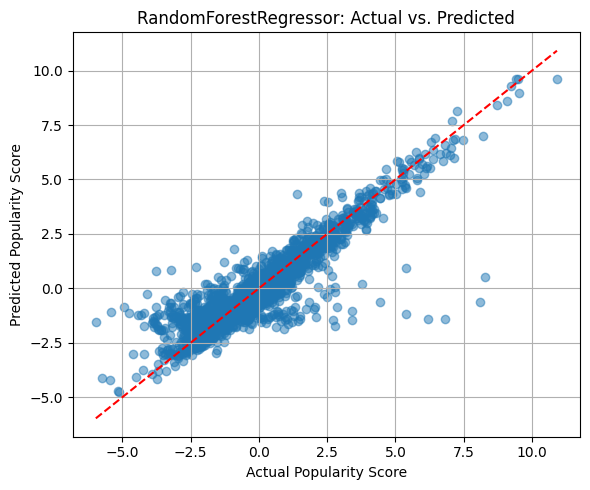

In [12]:
import matplotlib.pyplot as plt

# Create directory for model plots
plot_dir = 'outputs/model_plots'
os.makedirs(plot_dir, exist_ok=True)

# Fit the selected model using the optimized pipeline
rf_model = PipelineOptimization(RandomForestRegressor(n_estimators=167, max_depth=15, min_samples_split=6, random_state=0))
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Popularity Score")
plt.ylabel("Predicted Popularity Score")
plt.title("RandomForestRegressor: Actual vs. Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(plot_dir, 'rf_actual_vs_predicted.png'))
plt.close()

The plot shows a strong linear relationship between actual and predicted popularity scores, with most points clustered around the diagonal line. This indicates that the **RandomForestRegressor** model predicts book popularity accurately for the majority of cases, with only a few outliers. The close alignment to the reference line demonstrates good model fit and reliable performance.

#### Residual Analysis

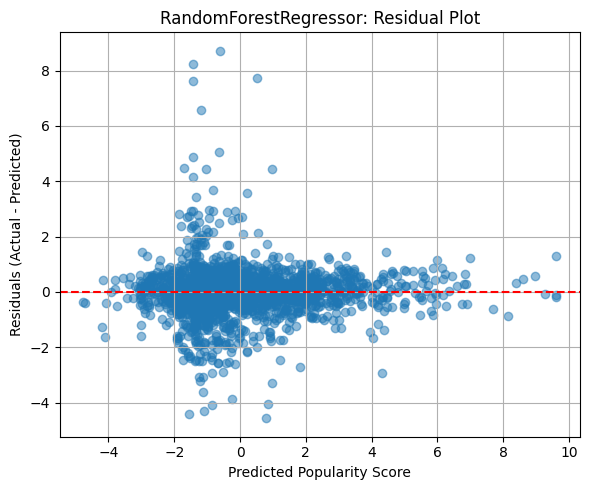

In [13]:
# Calculate residuals
residuals = y_test - y_pred_rf

# Plot residuals vs. predicted values
plt.figure(figsize=(6, 5))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Popularity Score")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("RandomForestRegressor: Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

The residual plot displays the differences between actual and predicted popularity scores for each sample. Most residuals are centered around zero, indicating that the RandomForestRegressor makes unbiased predictions overall. The random scatter of points suggests a good model fit, with no clear patterns or systematic errors. However, a few larger residuals and some spread at lower predicted scores may indicate outliers or areas where the model could be improved.

#### Feature Importance

In [14]:
from sklearn.pipeline import Pipeline

rf_model_no_selection = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', RandomForestRegressor(n_estimators=167, max_depth=15, min_samples_split=6, random_state=0))
])
rf_model_no_selection.fit(X_train, y_train)

preprocessor = rf_model_no_selection.named_steps['preprocessing'].named_steps['col_transform']
feature_names = preprocessor.get_feature_names_out()
importances = rf_model_no_selection.named_steps['model'].feature_importances_

feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)
feat_imp_df.to_csv('outputs/model_plots/rf_feature_importance.csv', index=False)
print(feat_imp_df.head(10))

                                   feature  importance
9              num__external_bbe_ratings_5    0.811854
276   remainder__external_popularity_score    0.027929
262         cat__publication_decade_2010.0    0.017198
1                           num__pages_log    0.016830
13       num__external_bbe_ratings_4_share    0.012129
272       remainder__author_book_count_log    0.012085
274  remainder__description_word_count_log    0.009244
273      remainder__description_length_log    0.009192
275    remainder__publisher_book_count_log    0.008686
12       num__external_bbe_ratings_3_share    0.005860


The top features and their relative importances are as follows:

| Rank | Feature                                 | Description                                 |
|------|-----------------------------------------|---------------------------------------------|
| 1    | `num__external_bbe_ratings_5`           | Count of 5-star external ratings            |
| 2    | `remainder__external_popularity_score`   | Composite external popularity metric        |
| 3    | `cat__publication_decade_2010.0`         | Indicator for books published in 2010s      |
| 4    | `num__pages_log`                         | Log-transformed page count                  |
| 5    | `num__external_bbe_ratings_4_share`      | Share of 4-star external ratings            |
| 6    | `remainder__author_book_count_log`       | Log-transformed author book count           |
| 7    | `remainder__description_word_count_log`  | Log-transformed description word count      |
| 8    | `remainder__description_length_log`      | Log-transformed description length          |
| 9    | `remainder__publisher_book_count_log`    | Log-transformed publisher book count        |
| 10   | `num__external_bbe_ratings_3_share`      | Share of 3-star external ratings            |

**Key Insights:**
- **External signals** (ratings, popularity scores) are the strongest predictors of engagement.
- **Publication recency** (e.g., 2010s indicator) is moderately important, partially supporting the hypothesis that newer books attract more engagement.
- **Internal metadata** (pages, author book count, description length) provides additional, but less substantial, predictive value.

**Conclusion:**  
External engagement metrics are the main drivers of predicted popularity, with publication recency and select metadata features providing secondary support. This confirms previous PPS analysis and aligns with business objectives for Bookwise Analytics.

## Model Readiness and Business Justification

Given the business requirements for Bookwise Analytics, the current **RandomForestRegressor** model is suitable for a v1 deployment:

- **Purpose:** The model is designed to inform decision makers and support the editorial team, not to automate final curation.
- **Performance:** With a test R² of 0.81 and RMSE of 0.94 (on a 1–5 scale), the model explains 81% of the variance and keeps average prediction error below 1 point. The actual vs. predicted plot shows a strong linear relationship, with most predictions closely matching true values and only a few outliers. The residual plot confirms that errors are centered around zero and randomly distributed, indicating unbiased predictions and no major systematic issues.
- **Risk:** The business risk is low. Editorial expertise will remain in the loop, so any model errors can be caught and corrected before impacting users.
- **Business Fit:** Variance in average ratings is expected and acceptable for curation. The model provides a data-driven baseline to guide decisions, not replace human judgment.

**Conclusion:**  
It is justifiable to move forward with this model as a v1. The model demonstrates strong predictive accuracy and reliability in visual diagnostics, meets business needs, supports decision making, and fits within the risk profile. Further improvements can be made iteratively as more data and feedback are collected.

In [15]:
import os
import joblib

v = '1'
model_dir = f'outputs/models/randomforest/{v}/'
os.makedirs(model_dir, exist_ok=True)

# Save rf_model pipeline as .pkl
joblib.dump(rf_model, os.path.join(model_dir, 'rf_model.pkl'))

print(f"Model saved to {os.path.join(model_dir, 'rf_model.pkl')}")

Model saved to outputs/models/randomforest/1/rf_model.pkl


In [16]:
import os
from huggingface_hub import HfApi
from pathlib import Path

# Set up Hugging Face API
api = HfApi()
repo_id = "revolucia/bookwise-analytics-ml"
repo_type = "dataset"
HF_TOKEN = os.getenv("HUGGINGFACE_TOKEN")

v = "1"
model_dir = Path(f"outputs/models/randomforest/{v}/")
model_path = model_dir / "rf_model.pkl"

if model_path.exists() and HF_TOKEN:
    print(f"Uploading model: {model_path.name} ...")
    api.upload_file(
        path_or_fileobj=str(model_path),
        path_in_repo=f"modeling_data/{model_path.name}",
        repo_id=repo_id,
        repo_type=repo_type,
        token=HF_TOKEN
    )
    print(f"Uploaded: {model_path.name}\n")
else:
    print(f"File not found or missing HF_TOKEN: {model_path}")

print("Model upload process completed.")

Uploading model: rf_model.pkl ...


rf_model.pkl:   0%|          | 0.00/58.3M [00:00<?, ?B/s]

Uploaded: rf_model.pkl

Model upload process completed.
